<a href="https://colab.research.google.com/github/chandan725/House-Price-Prediction-Model/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Model**

## Module Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics

# Load the Datasets

In [3]:
house = datasets.fetch_california_housing()

In [4]:
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
print('Features of Dataset:\n', house.feature_names)
print()
print('Target for Dataset: ', house.target_names)

Features of Dataset:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target for Dataset:  ['MedHouseVal']


In [6]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [7]:
df['label'] = house.target
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


## Exploratory Data Analysis

In [8]:
df.shape

(20640, 9)

In [9]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
label         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   label       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,label
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


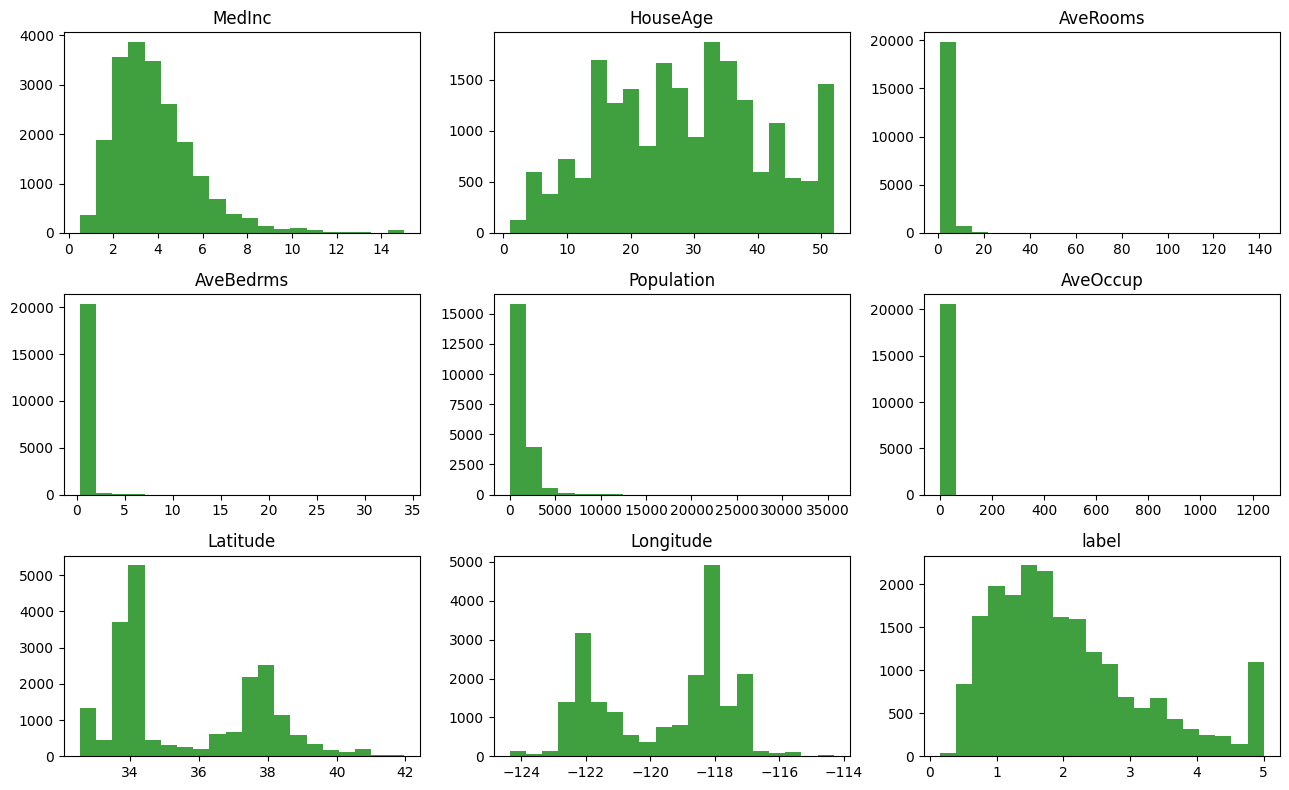

In [12]:
row=3
col=3

fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(13, 8))

k=0
for i in range(row):
  for j in range(col):
    ax[i, j].set_title(df.columns[k])
    ax[i, j].hist(df[df.columns[k]], bins=20, color='green', alpha=0.75)
    k += 1


plt.tight_layout()
plt.show()

## Coorelation Matrix

In [13]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,label
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
label,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

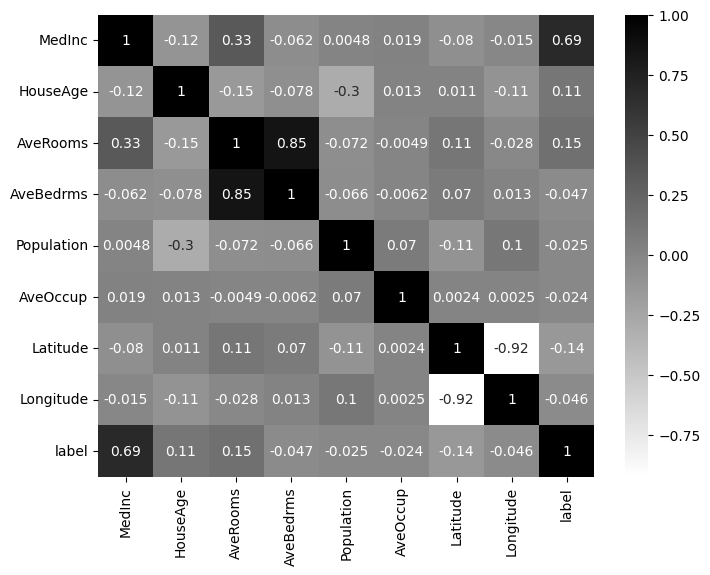

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='binary')

***Observation:***

**AveRooms & AveBedrms are highly +vely correlated with each-other, so can be dropped anyone**

**Latitude & Longitude are highly -vely correlated, so can be dropped anyone**

In [15]:
df2 = df.drop(['AveBedrms', 'Longitude'], axis=1)

In [16]:
df2.shape

(20640, 7)

In [17]:
X = df2.drop('label', axis=1)
print(X.shape)
print(type(X))

(20640, 6)
<class 'pandas.core.frame.DataFrame'>


In [18]:
y = df2['label']
print(y.shape)
print(type(y))

(20640,)
<class 'pandas.core.series.Series'>


# Regression Model

## Preprocessing of data for the model pipeline

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
print('Traing X Data: ', X_train.shape)
print('Testing X Data: ', X_test.shape)
print('Training y Data: ', y_train.shape)
print('Testing y Data: ', y_test.shape)

Traing X Data:  (16512, 6)
Testing X Data:  (4128, 6)
Training y Data:  (16512,)
Testing y Data:  (4128,)


## Model Pipeline

In [21]:
pipeline = Pipeline([('scale', StandardScaler()),
                     ('regressor', KNeighborsRegressor())])

pipeline.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('regressor', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'regressor': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'regressor__algorithm': 'auto',
 'regressor__leaf_size': 30,
 'regressor__metric': 'minkowski',
 'regressor__metric_params': None,
 'regressor__n_jobs': None,
 'regressor__n_neighbors': 5,
 'regressor__p': 2,
 'regressor__weights': 'uniform'}

## Model hyperparameter & Grid-Search CV

In [22]:
parameter = {
    'regressor__n_neighbors': [3, 5, 7, 11],   # Number of neighbors to consider
    'regressor__weights': ['uniform', 'distance'],   # Weighting of neighbors ('uniform' or 'distance')
    'regressor__p': [1, 2]   # Distance metric (1 for Manhattan distance, 2 for Euclidean distance)
             }

In [23]:
model = GridSearchCV(estimator=pipeline, param_grid=parameter, cv=3)

## Training of model

In [24]:
model.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'regressor__n_neighbors': [3, 5, 7, 11],
                         'regressor__p': [1, 2],
                         'regressor__weights': ['uniform', 'distance']})

In [25]:
model.cv_results_

{'mean_fit_time': array([0.05104963, 0.03294905, 0.02898908, 0.03603292, 0.04290764,
        0.02436988, 0.04975804, 0.06985585, 0.04451378, 0.03163187,
        0.02989364, 0.04071879, 0.04323634, 0.01769129, 0.014558  ,
        0.01470852]),
 'std_fit_time': array([0.02339557, 0.01347979, 0.00523763, 0.00699859, 0.02550444,
        0.00177909, 0.03364766, 0.01816526, 0.00963179, 0.01127888,
        0.00502583, 0.00999257, 0.01509027, 0.00435403, 0.00040302,
        0.00088548]),
 'mean_score_time': array([0.78834383, 0.69062646, 0.38298273, 0.35710613, 0.74227158,
        0.84034157, 0.82303508, 0.56180286, 0.85741607, 0.88867434,
        0.43718537, 0.52640724, 0.96908983, 0.49113679, 0.24221786,
        0.24285285]),
 'std_score_time': array([0.35139278, 0.0594759 , 0.07591683, 0.04786729, 0.13991854,
        0.33241137, 0.29024181, 0.1300148 , 0.15286558, 0.22688184,
        0.04626992, 0.11332106, 0.2583176 , 0.08473187, 0.03686282,
        0.03651206]),
 'param_regressor__n_neigh

In [26]:
result_df = pd.DataFrame(model.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_neighbors,param_regressor__p,param_regressor__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051050,0.023396,0.788344,0.351393,3,1,uniform,"{'regressor__n_neighbors': 3, 'regressor__p': ...",0.641623,0.582375,0.572799,0.598932,0.030439,13
1,0.032949,0.013480,0.690626,0.059476,3,1,distance,"{'regressor__n_neighbors': 3, 'regressor__p': ...",0.639462,0.583070,0.573937,0.598823,0.028977,14
2,0.028989,0.005238,0.382983,0.075917,3,2,uniform,"{'regressor__n_neighbors': 3, 'regressor__p': ...",0.633892,0.557537,0.547429,0.579619,0.038598,15
3,0.036033,0.006999,0.357106,0.047867,3,2,distance,"{'regressor__n_neighbors': 3, 'regressor__p': ...",0.632634,0.558544,0.547325,0.579501,0.037849,16
4,0.042908,0.025504,0.742272,0.139919,5,1,uniform,"{'regressor__n_neighbors': 5, 'regressor__p': ...",0.673965,0.623834,0.608510,0.635436,0.027953,8
5,0.024370,0.001779,0.840342,0.332411,5,1,distance,"{'regressor__n_neighbors': 5, 'regressor__p': ...",0.673336,0.625477,0.610139,0.636317,0.026915,7
6,0.049758,0.033648,0.823035,0.290242,5,2,uniform,"{'regressor__n_neighbors': 5, 'regressor__p': ...",0.669399,0.598674,0.576220,0.614765,0.039705,12
7,0.069856,0.018165,0.561803,0.130015,5,2,distance,"{'regressor__n_neighbors': 5, 'regressor__p': ...",0.668955,0.599399,0.578272,0.615542,0.038741,11
8,0.044514,0.009632,0.857416,0.152866,7,1,uniform,"{'regressor__n_neighbors': 7, 'regressor__p': ...",0.685295,0.638676,0.618625,0.647532,0.027929,4
9,0.031632,0.011279,0.888674,0.226882,7,1,distance,"{'regressor__n_neighbors': 7, 'regressor__p': ...",0.686147,0.641287,0.621374,0.649603,0.027089,3


## Best model & its prediction

In [27]:
model = model.best_estimator_

In [28]:
y_pred = model.predict(X_test)

# Model Metrics

In [29]:
print(f'Mean Absolute Error:  {round(metrics.mean_absolute_error(y_test, y_pred), 3)}')
print(f'Mean Squared Error: {round(metrics.mean_squared_error(y_test, y_pred), 3)}')
print(f'Root Mean Squared Error: {round((metrics.mean_squared_error(y_test, y_pred))**(0.5), 3)}')
print(f'R Squared Value: {round(metrics.r2_score(y_test, y_pred), 3)}')

Mean Absolute Error:  0.484
Mean Squared Error: 0.48
Root Mean Squared Error: 0.692
R Squared Value: 0.645


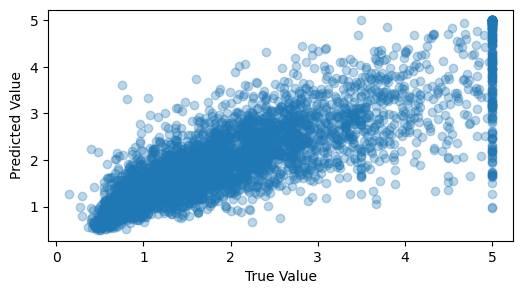

In [30]:
plt.figure(figsize=(6, 3))
plt.scatter(x = y_test, y = y_pred, alpha=0.3)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

# Model Function

In [31]:
def model_function(X_train, y_train, X_test, y_test, scale, model):

  pipeline = Pipeline([('scale', scale), ('model', model)])
  pipeline.fit(X_train, y_train)

  y_pred = pipeline.predict(X_test)

  print(f'Mean Absolute Error:  {round(metrics.mean_absolute_error(y_test, y_pred), 4)}')
  print(f'Mean Squared Error: {round(metrics.mean_squared_error(y_test, y_pred), 4)}')
  print(f'Root Mean Squared Error: {round(((metrics.mean_squared_error(y_test, y_pred))**(0.5)), 4)}')
  print(f'R Squared Value: {round(metrics.r2_score(y_test, y_pred), 4)}')
  plt.figure(figsize=(7, 4))
  plt.scatter(x = y_test, y = y_pred, alpha=0.2)
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')

## Linear Regression Model (Min Max Scaling)

Mean Absolute Error:  0.6041
Mean Squared Error: 0.6738
Root Mean Squared Error: 0.8209
R Squared Value: 0.5016


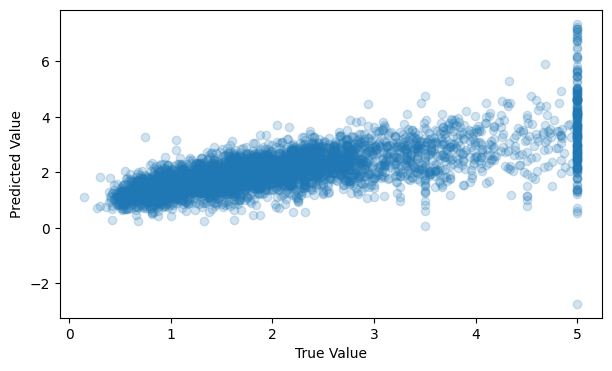

In [32]:
model_function(X_train, y_train, X_test, y_test, scale=MinMaxScaler(), model=LinearRegression())

## Linear Regression Model (Standard Scaling)

Mean Absolute Error:  0.6041
Mean Squared Error: 0.6738
Root Mean Squared Error: 0.8209
R Squared Value: 0.5016


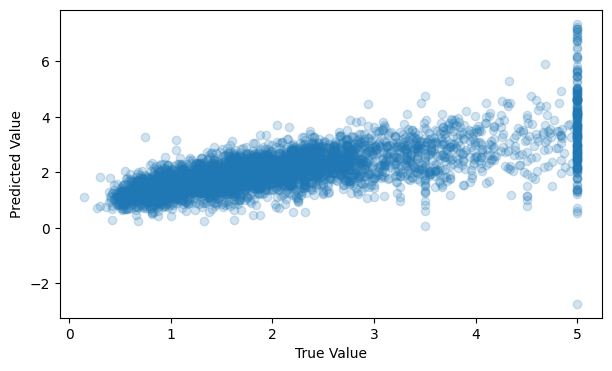

In [33]:
model_function(X_train, y_train, X_test, y_test, scale=StandardScaler(), model=LinearRegression())

## Ridge Regression Model (Min Max Scaling)

Mean Absolute Error:  0.6048
Mean Squared Error: 0.6711
Root Mean Squared Error: 0.8192
R Squared Value: 0.5036


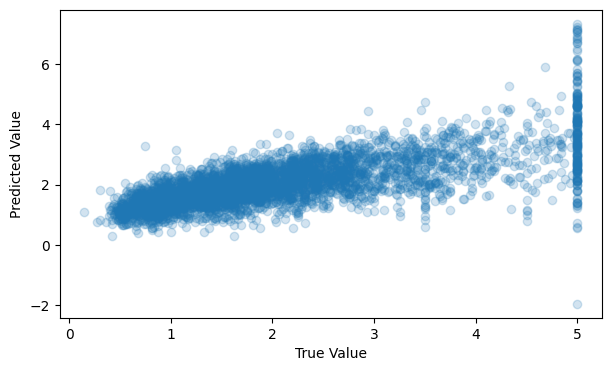

In [34]:
model_function(X_train, y_train, X_test, y_test, model=Ridge(), scale=MinMaxScaler())

## Ridge Regression Model (Standard Scaling)

Mean Absolute Error:  0.6041
Mean Squared Error: 0.6738
Root Mean Squared Error: 0.8209
R Squared Value: 0.5016


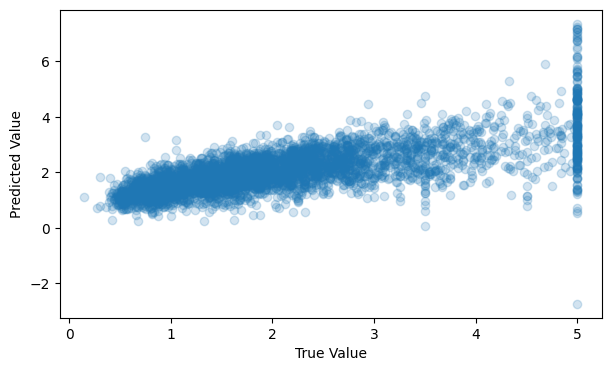

In [35]:
model_function(X_train, y_train, X_test, y_test, scale=StandardScaler(), model=Ridge())

## Lasso Regression Model (Min Max Scaling)

Mean Absolute Error:  0.9147
Mean Squared Error: 1.352
Root Mean Squared Error: 1.1628
R Squared Value: -0.0001


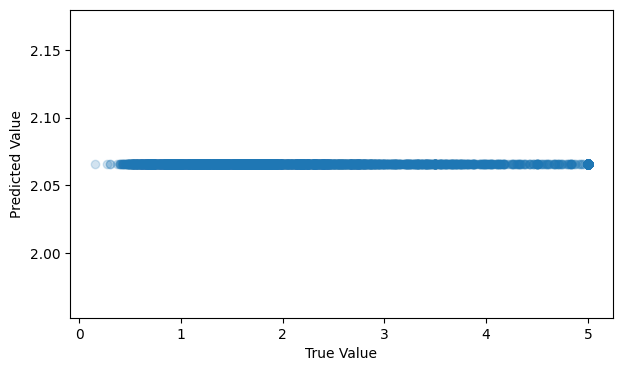

In [36]:
model_function(X_train, y_train, X_test, y_test, model=Lasso(), scale=MinMaxScaler())

## Lasso Regression Model (Standard Scaling)

Mean Absolute Error:  0.9147
Mean Squared Error: 1.352
Root Mean Squared Error: 1.1628
R Squared Value: -0.0001


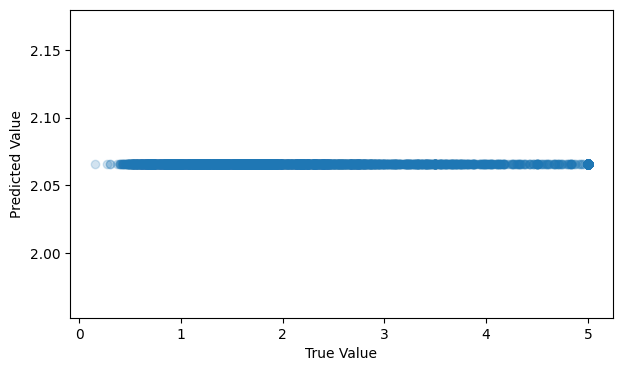

In [37]:
model_function(X_train, y_train, X_test, y_test, model=Lasso(), scale=StandardScaler())

## KNN Regression Model (Min Max Scaling)

Mean Absolute Error:  0.541
Mean Squared Error: 0.6003
Root Mean Squared Error: 0.7748
R Squared Value: 0.556


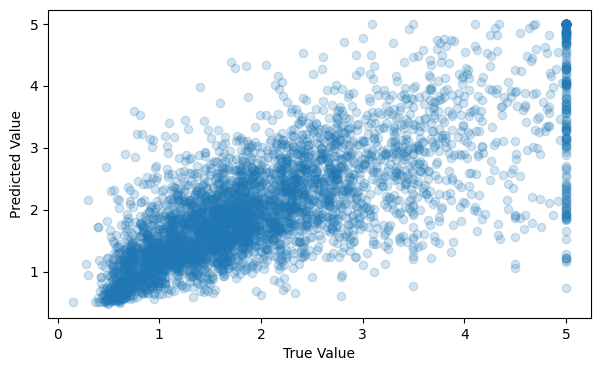

In [38]:
model_function(X_train, y_train, X_test, y_test, scale=MinMaxScaler(), model=KNeighborsRegressor())

## KNN Regression Model (Standard Scaling)

Mean Absolute Error:  0.5157
Mean Squared Error: 0.5388
Root Mean Squared Error: 0.734
R Squared Value: 0.6014


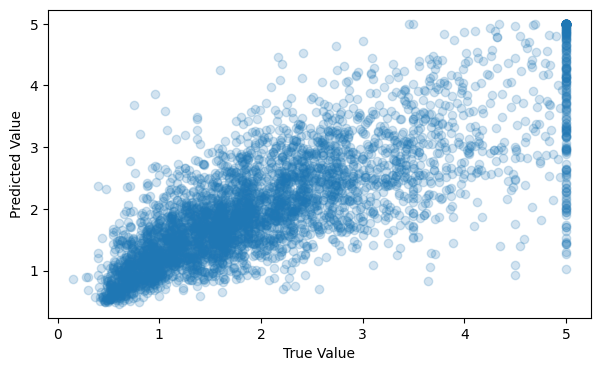

In [39]:
model_function(X_train, y_train, X_test, y_test, scale=StandardScaler(), model=KNeighborsRegressor())

## Decision Tree Regression Model (Min Max Scaling)

Mean Absolute Error:  0.5734
Mean Squared Error: 0.7372
Root Mean Squared Error: 0.8586
R Squared Value: 0.4547


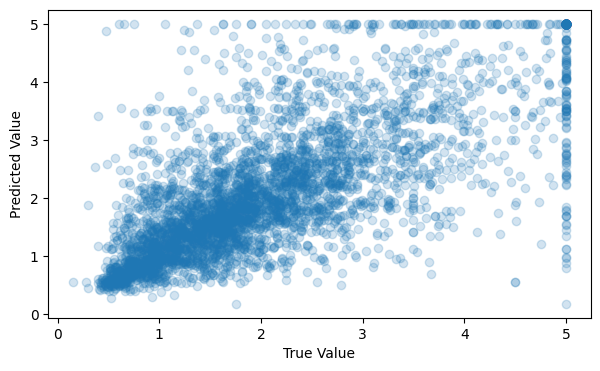

In [40]:
model_function(X_train, y_train, X_test, y_test, scale=MinMaxScaler(), model=DecisionTreeRegressor())

## Decision Tree Regression Model (Standard Scaling)

Mean Absolute Error:  0.579
Mean Squared Error: 0.7524
Root Mean Squared Error: 0.8674
R Squared Value: 0.4435


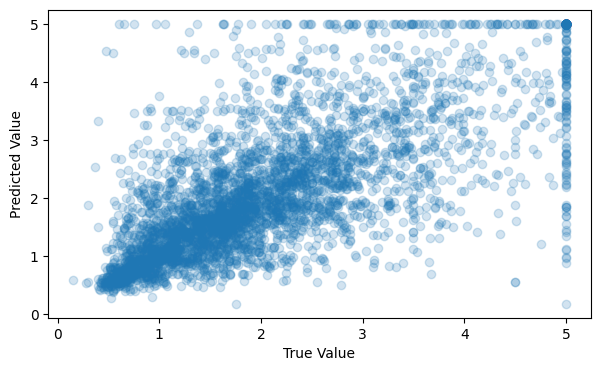

In [41]:
model_function(X_train, y_train, X_test, y_test, scale=StandardScaler(), model=DecisionTreeRegressor())